## Support Vector Machines

In [3]:
%cd C:\\Users\\s\\Downloads\\machine_learning\\machine-learning-ex6\\ex6
%pwd

C:\Users\s\Downloads\machine_learning\machine-learning-ex6\ex6


'C:\\Users\\s\\Downloads\\machine_learning\\machine-learning-ex6\\ex6'

### Linear kernel

(51, 2) (51, 1)


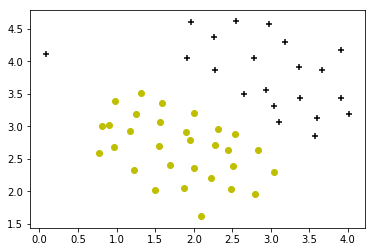

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm


data1 = loadmat('ex6data1.mat')
data1
x10 = data1['X']
y10 = data1['y']
print(x10.shape, y10.shape)

pos1 = np.where(y10.ravel() == 1)
neg1 = np.where(y10.ravel() == 0)

plt.scatter(x10[pos1, 0], x10[pos1, 1], color='black', marker='+')
plt.scatter(x10[neg1, 0], x10[neg1, 1], color='y', marker='o')
plt.show()

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Accuracy: 0.9803921568627451
LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Accuracy: 1.0


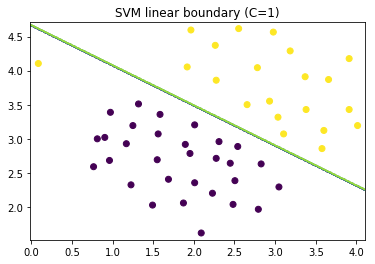

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


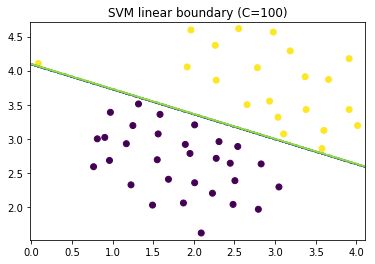

In [25]:
c1 = 1
svc1 = svm.LinearSVC(C=c1)
print(svc1)

svc1.fit(x10, y10.ravel())
y10_pred1 = svc1.predict(x10)
print('Accuracy:', np.mean(y10_pred1 == y10.ravel()))

def plot_decision_boundary(pred_func, x, y, gap):
    x_min, x_max = x[:, 0].min() - gap, x[:, 0].max() + gap
    y_min, y_max = x[:, 1].min() - gap, x[:, 1].max() + gap
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    
    plt.contour(xx, yy, z)
    plt.scatter(x[:, 0], x[:, 1], c=y.ravel())
    
plot_decision_boundary(lambda x:svc1.predict(x), x10, y10, 0.1)
plt.title('SVM linear boundary (C=1)')
plt.show()

c2 = 100
svc2 = svm.LinearSVC(C=c2)
print(svc2)

svc2.fit(x10, y10.ravel())
y10_pred2 = svc2.predict(x10)
print('Accuracy:', np.mean(y10_pred2 == y10.ravel()))

plot_decision_boundary(lambda x:svc2.predict(x), x10, y10, 0.1)
plt.title('SVM linear boundary (C=100)')
plt.show()

### Gaussian kernel

In [20]:
def gaussian_kernel(x1, x2, sigma):
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    sim = np.exp(-np.sum((x1 - x2) ** 2) / (2 * sigma ** 2))
    
    return sim

print(gaussian_kernel(np.array([1, 2, 1]), np.array([0, 4, -1]), 2))

0.32465246735834974


(863, 2) (863, 1)


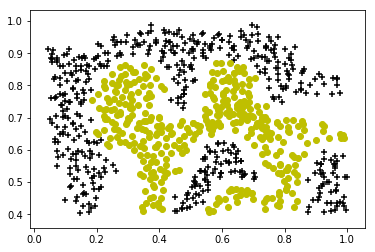

In [27]:
data2 = loadmat('ex6data2.mat')
data2
x20 = data2['X']
y20 = data2['y']
print(x20.shape, y20.shape)

pos2 = np.where(y20.ravel() == 1)
neg2 = np.where(y20.ravel() == 0)

plt.scatter(x20[pos2, 0], x20[pos2, 1], color='black', marker='+')
plt.scatter(x20[neg2, 0], x20[neg2, 1], color='y', marker='o')
plt.show()

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy: 0.9976825028968713


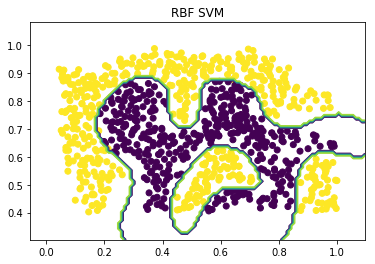

In [30]:
svc3 = svm.SVC(C=100, kernel='rbf', gamma=50)  # gamma = 1 / (2 * sigma ** 2)
print(svc3)
svc3.fit(x20, y20.ravel())

y20_pred = svc3.predict(x20)
print('Accuracy:', np.mean(y20_pred == y20.ravel()))

plot_decision_boundary(lambda x:svc3.predict(x), x20, y20, 0.1)
plt.title('RBF SVM')
plt.show()

(211, 2) (211, 1) (200, 2) (200, 1)


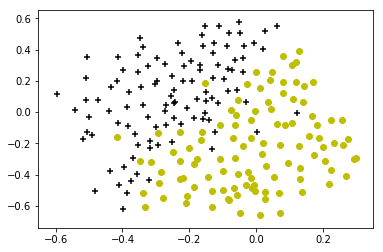

In [29]:
data3 = loadmat('ex6data3.mat')
data3
x30 = data3['X']
y30 = data3['y']
x30_val = data3['Xval']
y30_val = data3['yval']
print(x30.shape, y30.shape, x30_val.shape, y30_val.shape)

pos3 = np.where(y30.ravel() == 1)
neg3 = np.where(y30.ravel() == 0)

plt.scatter(x30[pos3, 0], x30[pos3, 1], color='black', marker='+')
plt.scatter(x30[neg3, 0], x30[neg3, 1], color='y', marker='o')
plt.show()

In [33]:
c_vec = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
sigma_vec = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
gamma_vec = 1 / (2 * sigma_vec ** 2)
#print(gamma_vec)

best_score = 0
best_C = 0
best_gamma = 0
for C in c_vec:
    for gamma in gamma_vec:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(x30, y30.ravel())
        score = svc.score(x30_val, y30_val)
        
        if score > best_score:
            best_score = score
            best_C = C
            best_gamma = gamma
            
print(best_C, best_gamma)

1.0 49.99999999999999


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy of training set: 0.9478672985781991
Accuracy of validation set: 0.965


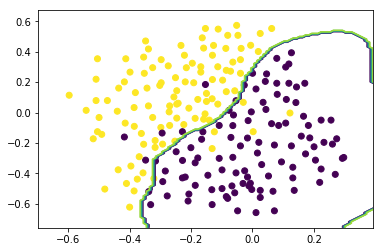

In [34]:
svc4 = svm.SVC(C=1, kernel='rbf', gamma=50)
print(svc4)
svc4.fit(x30, y30.ravel())

y30_pred = svc4.predict(x30)
y30_val_pred = svc4.predict(x30_val)
print('Accuracy of training set:', np.mean(y30_pred == y30.ravel()))
print('Accuracy of validation set:', np.mean(y30_val_pred == y30_val.ravel()))

plot_decision_boundary(lambda x:svc4.predict(x), x30, y30, 0.1)

### Spam Classification

In [36]:
spam_train = loadmat('spamTrain.mat')
spam_train
spam_train_x0 = spam_train['X']
spam_train_y0 = spam_train['y']
print(spam_train_x0.shape, spam_train_y0.shape)

spam_test = loadmat('spamTest.mat')
spam_test
spam_test_x0 = spam_test['Xtest']
spam_test_y0 = spam_test['ytest']
print(spam_test_x0.shape, spam_test_y0.shape)

(4000, 1899) (4000, 1)
(1000, 1899) (1000, 1)


In [37]:
svc5 = svm.SVC()
svc5.fit(spam_train_x0, spam_train_y0)
print('Accuracy of training set:', svc5.score(spam_train_x0, spam_train_y0))
print('Accuracy of test set:', svc5.score(spam_test_x0, spam_test_y0))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of training set: 0.944
Accuracy of test set: 0.953
